#              **Ford Driver Stay Alert**:


---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Preparation**](#Section71)
  
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---
- Driving while distracted, fatigued or drowsy may lead to accidents. Activities that divert the driver's attention from the road ahead, such as engaging in a conversation with other passengers in the car, making or receiving phone calls, sending or receiving text messages, eating while driving or events outside the car may cause driver distraction. Fatigue and drowsiness can result from driving long hours or from lack of sleep.

- The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

<br> 
<center><img src="http://brandtimes.com.ng/wp-content/uploads/2016/05/images-7.jpeg" width="600" height="300" /></center>

---
<a name = Section2></a>
# **2. Objective**
---

- As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “driver is Alert or Not”.

    IsAlert status can have two values: 1 or 0.

    1: if the Driver is alert.

    0: if the driver is not alert.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling  

     |████████████████████████████████| 1.6 MB 15.7 MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 268 kB 14.9 MB/s 
     |████████████████████████████████| 4.7 MB 66.1 MB/s 
     |████████████████████████████████| 690 kB 52.0 MB/s 
     |████████████████████████████████| 9.8 MB 45.5 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 102 kB 56.5 MB/s 
     |████████████████████████████████| 296 kB 45.9 MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
# from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # For verifying model performance using classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.tree import DecisionTreeClassifier                     # to create a DecisionTreeclassifier

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by lending club and its description is shown below in the table.


In [4]:
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


In [5]:
fordTrain= pd.read_csv('fordTrain.csv')
fordTest= pd.read_csv('fordTest.csv')

In [6]:
fordTrain.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [7]:
fordTest.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [8]:
print("Loan train data shape", fordTrain.shape)
print("Loan test data shape", fordTest.shape)

Loan train data shape (604329, 33)
Loan test data shape (120840, 33)


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [9]:
fordTrain.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [10]:
fordTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

**Observation:**

- We can observe that there is **no null data present** and all **features** have **correct data types**.

In [11]:
fordTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [12]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [13]:
fordTrain.duplicated().sum()

0

**There is no any duplicate data.**

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [14]:
fordTrain.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

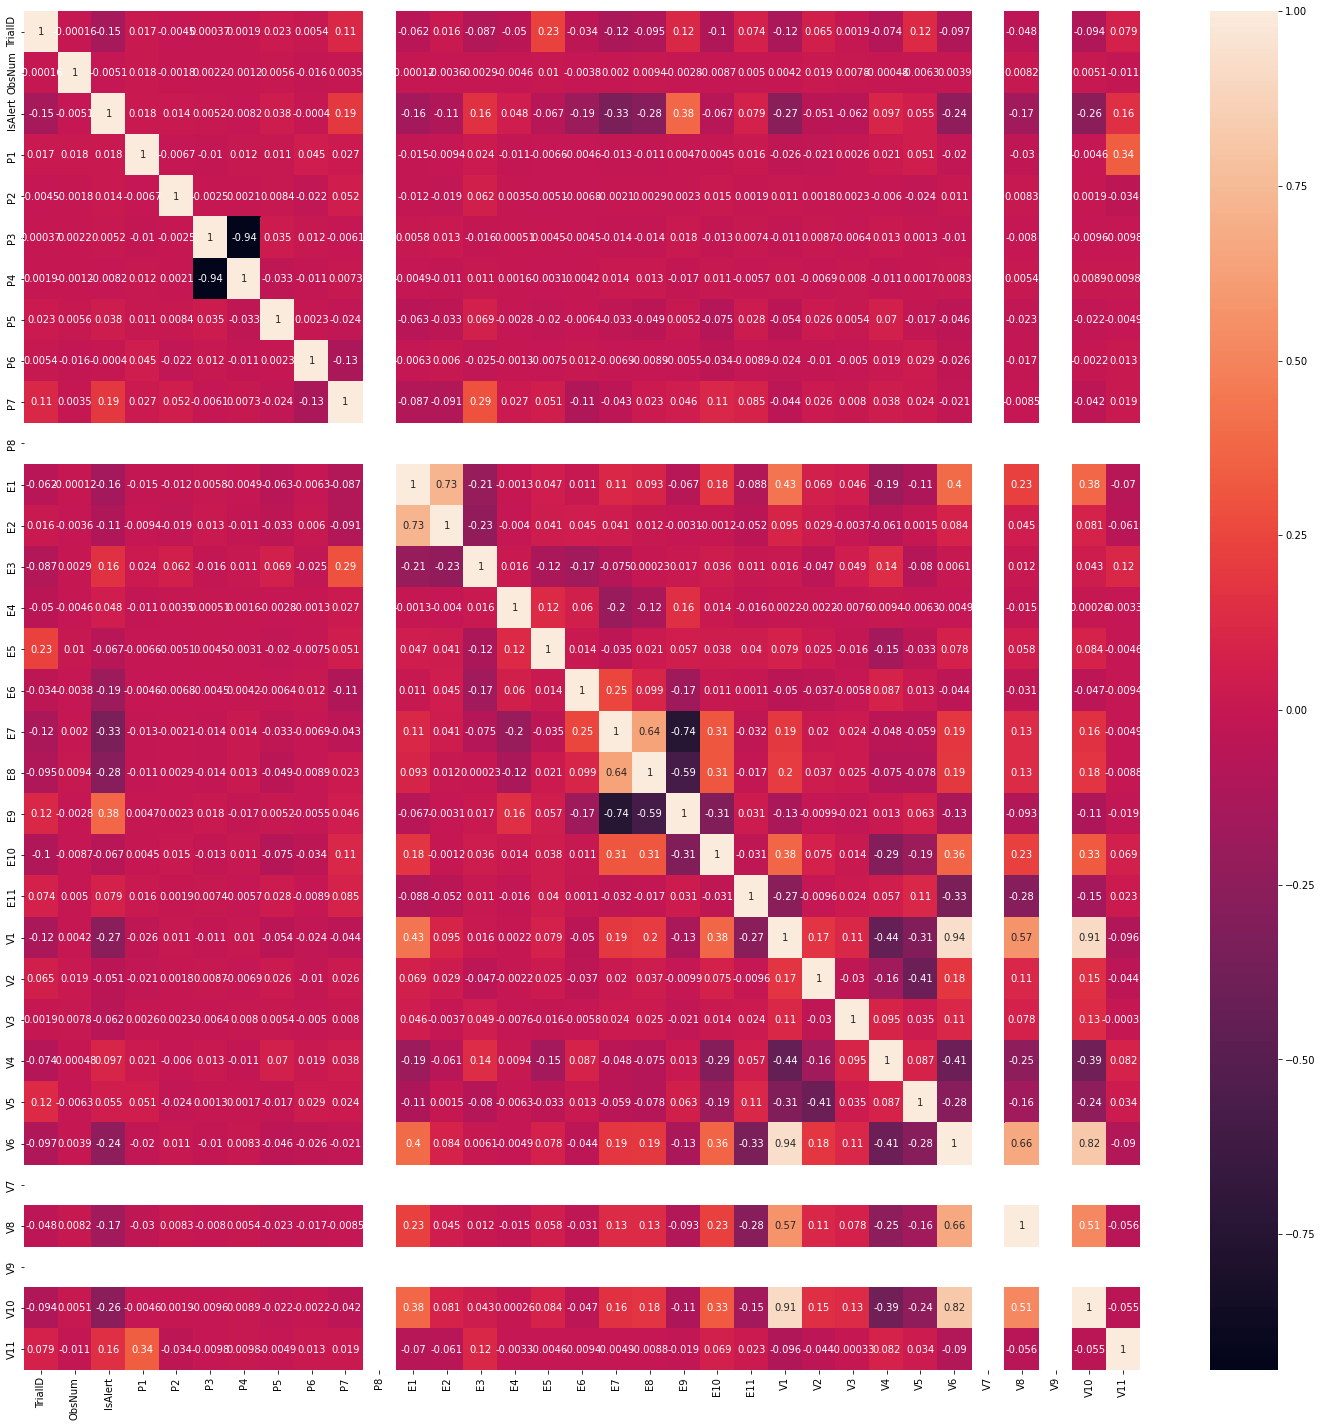

In [15]:
fig,ax=plt.subplots(figsize=(25,25))
sns.heatmap(fordTrain.corr(), annot=True, ax=ax)

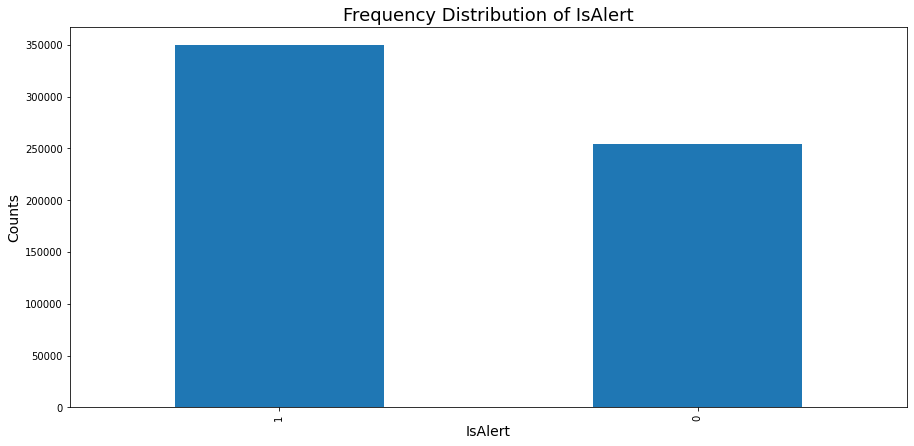

In [16]:
fg= plt.figure(figsize=[15,7])
fordTrain['IsAlert'].value_counts().plot(kind="bar")
plt.xlabel('IsAlert' , size=14)
plt.ylabel('Counts', size=14)
plt.title('Frequency Distribution of IsAlert', size=18)
plt.show()

<a name = Section7></a>

---
# **7. Post Data Processing**
---


<a name = Section73></a>
### **7.1 Data Preparation**

- **Split** the data into **80:20** inside train_test_split.

- Make sure to set the **random_state = 42**.

---

<details>

**<summary>Hint:</summary>**

- You can use .train_test_split functionality of sklearn package to achieve the objective.

</details>

In [17]:
 #Dropping unnecesary features like TrialID and ObsNum from train data
 X = fordTrain.iloc[:, 3:]
 y = fordTrain['IsAlert']

#  fordTest= fordTest.iloc[:, 2:]

In [18]:
X.head()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsAlert, dtype: int64

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P1      604329 non-null  float64
 1   P2      604329 non-null  float64
 2   P3      604329 non-null  int64  
 3   P4      604329 non-null  float64
 4   P5      604329 non-null  float64
 5   P6      604329 non-null  int64  
 6   P7      604329 non-null  float64
 7   P8      604329 non-null  int64  
 8   E1      604329 non-null  float64
 9   E2      604329 non-null  float64
 10  E3      604329 non-null  int64  
 11  E4      604329 non-null  int64  
 12  E5      604329 non-null  float64
 13  E6      604329 non-null  int64  
 14  E7      604329 non-null  int64  
 15  E8      604329 non-null  int64  
 16  E9      604329 non-null  int64  
 17  E10     604329 non-null  int64  
 18  E11     604329 non-null  float64
 19  V1      604329 non-null  float64
 20  V2      604329 non-null  float64
 21  V3      60

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [22]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (483463, 30) (483463,)
Testing Data Shape: (120866, 30) (120866,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, you will develop decision tree-based model.

- Then **analyze the results** obtained and **make observations**.

- For **evaluation purposes** we will **focus** on the **precision and recall score**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.`

**Random Forest Classifier**`

In [23]:
rf= RandomForestClassifier()                # Intialize the model
rf.fit(X_train, y_train)                    # Fit the data in model
y_rf_train_pred = rf.predict(X_train)       # Predict the train data
y_rf_test_pred = rf.predict(X_test)         # Predict the test data

**Decision Tree Classifier**

In [24]:
dt = DecisionTreeClassifier(max_depth=4 , min_samples_split= 4) # Intialize the model
dt.fit(X_train, y_train)                                        # Fit the data in model
preds_dt_train = dt.predict(X_train)                            # Predict the train data
preds_dt_test = dt.predict(X_test)                              # Predict the test data

**Regression Tree**`

In [25]:
rt = LogisticRegression()                                     # Intialize the model
rt.fit(X_train, y_train)                                      # Fit the data in model
preds_rt_train = rt.predict(X_train)                          # Predict the train data
preds_rt_test = rt.predict(X_test)                            # Predict the test data

**Model Evaluation using Confusion Matrix and Classification**

In [26]:
def confusionmatrix(model=None):
    y_train_pred_count = model.predict(X_train)
    y_test_pred_count = model.predict(X_test)
    
     
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
    plot_confusion_matrix(estimator = model, X = X_train, y_true = y_train, cmap = 'YlGnBu', ax = ax1)
    plot_confusion_matrix(estimator = model, X = X_test, y_true = y_test, cmap = 'YlGnBu', ax = ax2)
    ax1.set_title(label = 'Train Data', size = 14)
    ax2.set_title(label = 'Test Data', size = 14)
    ax1.grid(b = False)
    ax2.grid(b = False)
    plt.suptitle(t = 'Confusion Matrix', size = 16)
    plt.show()
    print('  Training Report ')
    logistic_report_train = classification_report(y_train, y_train_pred_count)
    print(logistic_report_train)
    print('   Testing Report ')
    logistic_report_test = classification_report(y_test, y_test_pred_count)
    print(logistic_report_test)

	

In [32]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

**Random Forest Evaluaiton**

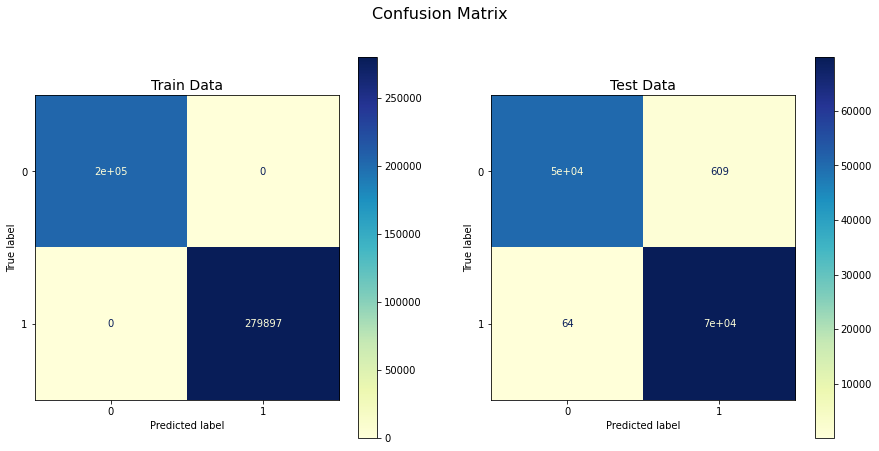

  Training Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203566
           1       1.00      1.00      1.00    279897

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463

   Testing Report 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50978
           1       0.99      1.00      1.00     69888

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



In [29]:
confusionmatrix(model=rf)

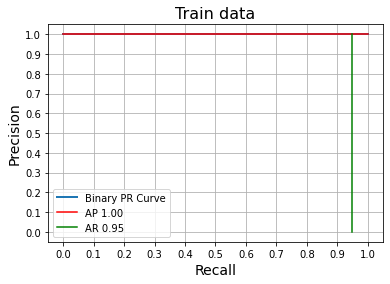

In [34]:
y_train_pred_proba = rf.predict_proba(X_train)
plot_precision_recall(y_true=y_train, y_pred=y_train_pred_proba[:,1], train_or_test ='Train data')

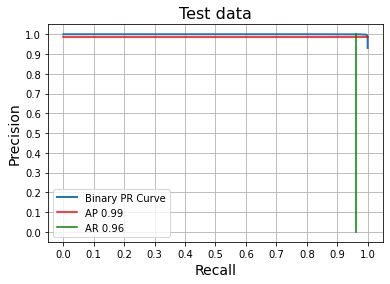

In [35]:
y_test_pred_proba = rf.predict_proba(X_test)
plot_precision_recall(y_true=y_test, y_pred=y_test_pred_proba[:,1], train_or_test ='Test data')

**Decision Tree Evaluation**

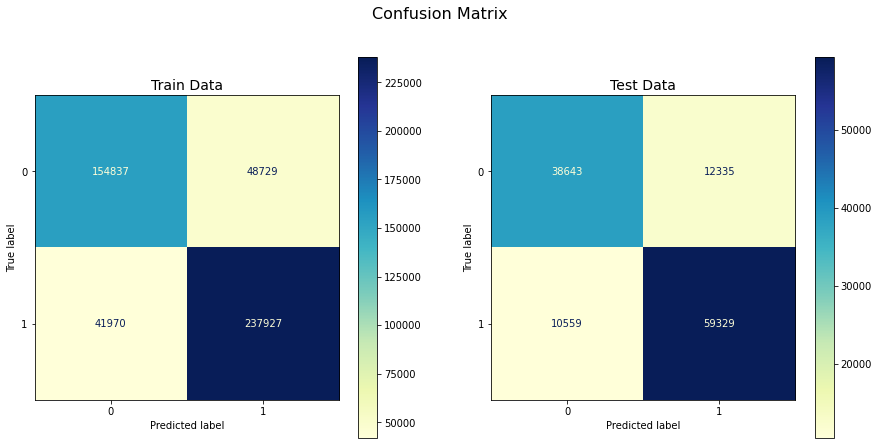

  Training Report 
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    203566
           1       0.83      0.85      0.84    279897

    accuracy                           0.81    483463
   macro avg       0.81      0.81      0.81    483463
weighted avg       0.81      0.81      0.81    483463

   Testing Report 
              precision    recall  f1-score   support

           0       0.79      0.76      0.77     50978
           1       0.83      0.85      0.84     69888

    accuracy                           0.81    120866
   macro avg       0.81      0.80      0.80    120866
weighted avg       0.81      0.81      0.81    120866



In [36]:
#Decision Tree 
confusionmatrix(model=dt)

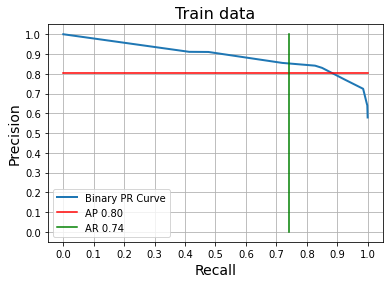

In [37]:
y_train_pred_proba = dt.predict_proba(X_train)
plot_precision_recall(y_true=y_train, y_pred=y_train_pred_proba[:,1], train_or_test ='Train data')

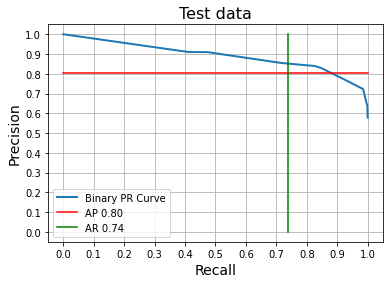

In [39]:
y_test_pred_proba = dt.predict_proba(X_test)
plot_precision_recall(y_true=y_test, y_pred=y_test_pred_proba[:,1], train_or_test ='Test data')

**Logistic Regression Evaluation**

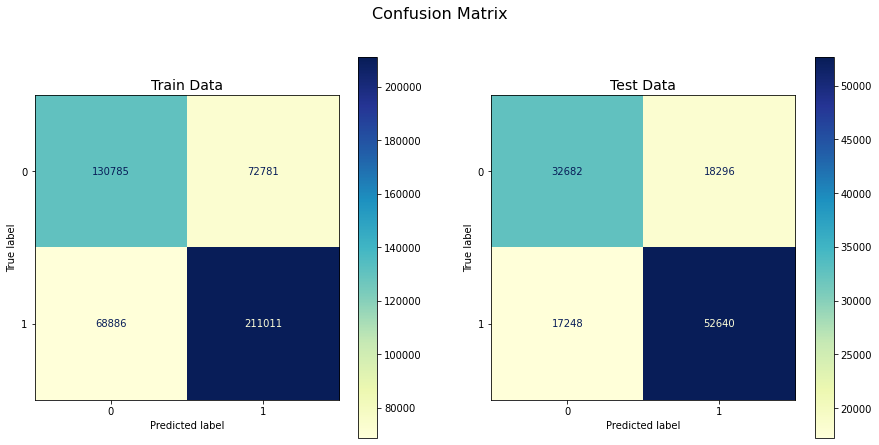

  Training Report 
              precision    recall  f1-score   support

           0       0.66      0.64      0.65    203566
           1       0.74      0.75      0.75    279897

    accuracy                           0.71    483463
   macro avg       0.70      0.70      0.70    483463
weighted avg       0.71      0.71      0.71    483463

   Testing Report 
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     50978
           1       0.74      0.75      0.75     69888

    accuracy                           0.71    120866
   macro avg       0.70      0.70      0.70    120866
weighted avg       0.71      0.71      0.71    120866



In [40]:
confusionmatrix(model=rt)

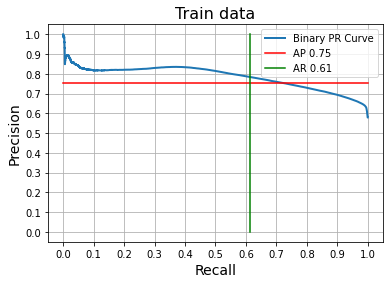

In [41]:
y_train_pred_proba = rt.predict_proba(X_train)
plot_precision_recall(y_true=y_train, y_pred=y_train_pred_proba[:,1], train_or_test ='Train data')

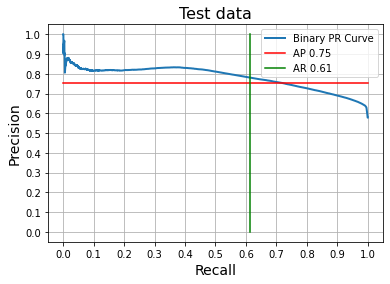

In [42]:
y_test_pred_proba = rt.predict_proba(X_test)
plot_precision_recall(y_true=y_test, y_pred=y_test_pred_proba[:,1], train_or_test ='Test data')

**We are using Random Forest model on actual ford test data.**

In [44]:
fordTest.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [64]:
fordTestFinal = fordTest.copy()

In [65]:
fordTestFinal = fordTestFinal.iloc[:, 3:]

In [66]:
fordTestFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   P1      120840 non-null  float64
 1   P2      120840 non-null  float64
 2   P3      120840 non-null  int64  
 3   P4      120840 non-null  float64
 4   P5      120840 non-null  float64
 5   P6      120840 non-null  int64  
 6   P7      120840 non-null  float64
 7   P8      120840 non-null  int64  
 8   E1      120840 non-null  float64
 9   E2      120840 non-null  float64
 10  E3      120840 non-null  int64  
 11  E4      120840 non-null  int64  
 12  E5      120840 non-null  float64
 13  E6      120840 non-null  int64  
 14  E7      120840 non-null  int64  
 15  E8      120840 non-null  int64  
 16  E9      120840 non-null  int64  
 17  E10     120840 non-null  int64  
 18  E11     120840 non-null  float64
 19  V1      120840 non-null  float64
 20  V2      120840 non-null  float64
 21  V3      12

In [67]:
preds_rf_test_final = rf.predict(fordTestFinal)

In [68]:
df= pd.DataFrame(preds_rf_test_final)
df.value_counts()

1    97030
0    23810
dtype: int64

In [69]:
fordTest['IsAlert']=preds_rf_test_final

In [70]:
fordTest.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,1,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,1,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,1,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,1,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,1,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [71]:
file_submission=fordTest[['TrialID', 'ObsNum', 'IsAlert']]

In [72]:
file_submission.head()

,TrialID,ObsNum,IsAlert
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


In [73]:
file_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   TrialID  120840 non-null  int64
 1   ObsNum   120840 non-null  int64
 2   IsAlert  120840 non-null  int64
dtypes: int64(3)
memory usage: 2.8 MB


In [74]:
file_submission.to_csv('my_submission.csv', index=False)

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed different features** and understood their nature and distribution.

- We split the data in a **stratified** fashion and develop a Random Forest model, Decision Tree model and Logistic Regression model

- We observed that the **results** obtained by Random Forest model better than other two models.